# Modelos de Machine Learning 

Limpie algunos datos que sentía que eran sobrantes o que no había terminado de limpiar bien, use varios modelos de regresion para probar cual era el mejor tambien use cross validation para hacer distintas busquedas, use gridsearch para buscar los mejores parametros para mis modelos que tenian varios hiperparametros como fueron RandomForest y SVR, tuve bastante complicaciones a la hora de seleccionar los datos que queria usar porque sentia que no habia mucha correlación entre algunos, pero la verdad fue muy interesante hacer todo esto

## Importamos las librerias necesarias 

In [3]:
import sklearn

print("Versión de scikit-learn:", sklearn.__version__)


Versión de scikit-learn: 1.0.2


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Abrimos nuestro archivo con pandas 

In [5]:
df = pd.read_parquet("../data/parquet/steam_games_modelo.parquet", engine="pyarrow")
df

,app_name,url,price,early_access,developer,sentiment,metascore,año_v,Accounting,Action,...,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,Tracked Motion Controllers,Valve Anti-Cheat enabled,Windows Mixed Reality
0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,4.99,0,Kotoshiro,None,NaN,2018,0,1,...,0,0,0,0,0,0,0,0,0,0
1,弹炸人2222,http://store.steampowered.com/app/767400/2222/,0.99,0,彼岸领域,Mostly Positive,NaN,2017,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Log Challenge,http://store.steampowered.com/app/773570/Log_C...,2.99,0,<NA>,2 user reviews,NaN,2018,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,3.99,0,Trickjump Games Ltd,Mixed,NaN,2018,0,1,...,1,0,0,0,0,0,0,0,0,0
4,SNOW - All Access Basic Pass,http://store.steampowered.com/app/774276/SNOW_...,9.99,0,Poppermost Productions,None,NaN,2018,0,0,...,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28651,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,1.99,0,"Nikita ""Ghost_RUS""",Negative,NaN,2018,0,0,...,1,0,0,0,0,0,0,0,0,0
28652,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,4.99,0,Sacada,5 user reviews,NaN,2018,0,0,...,1,1,1,0,0,0,0,0,0,0
28653,Russian Roads,http://store.steampowered.com/app/610660/Russi...,1.99,0,Laush Dmitriy Sergeevich,Mostly Positive,NaN,2018,0,0,...,1,0,0,1,0,0,0,0,0,0
28654,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,4.99,0,"xropi,stev3ns",1 user reviews,NaN,2017,0,0,...,1,1,0,0,0,0,0,0,0,0


<h4>Copiamos el df para poder hacer cambios sin afectar</h4>

In [6]:
df2 = df.copy()

#### Transformamos los datos que son importantes en numeros para poder usar regresion lineal mas adelante 

In [7]:
df2["año_v"] = df2["año_v"].astype("int64")

In [8]:
df2["developer"].isnull().sum()

2747

In [9]:
df2.corr()

,price,early_access,metascore,año_v,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,...,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,Tracked Motion Controllers,Valve Anti-Cheat enabled,Windows Mixed Reality
price,1.000000,0.054841,0.176329,0.021826,0.054885,-0.033370,-0.038166,0.128331,0.087434,-0.197992,...,-0.022659,0.007031,-0.056694,-0.011088,0.019854,0.097615,0.046663,0.035121,-0.002364,0.033266
early_access,0.054841,1.000000,0.019054,0.117289,-0.003590,0.046181,0.004377,0.000103,-0.006355,-0.048114,...,-0.085405,-0.071610,-0.042881,-0.089622,0.001727,0.004705,0.012903,0.205777,-0.021926,0.066635
metascore,0.176329,0.019054,1.000000,-0.108627,NaN,-0.040145,-0.048358,NaN,NaN,-0.019407,...,-0.041810,0.075076,-0.005490,-0.021350,0.008863,0.078064,0.038141,0.001697,0.046235,0.026958
año_v,0.021826,0.117289,-0.108627,1.000000,0.005521,-0.005767,0.032086,0.014287,0.010261,0.091080,...,0.163883,0.033799,0.037706,0.127097,0.012790,0.036288,0.015925,0.126250,-0.038822,0.043664
Accounting,0.054885,-0.003590,NaN,0.005521,1.000000,-0.010661,-0.008515,0.036412,0.047794,-0.008735,...,-0.015152,-0.010053,-0.007262,-0.011714,-0.000746,-0.003653,-0.000428,-0.003255,-0.001782,-0.000966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Steam Workshop,0.097615,0.004705,0.078064,0.036288,-0.003653,-0.052662,-0.085309,0.022337,-0.009625,-0.078931,...,0.130728,0.170107,0.135584,0.182914,0.012711,1.000000,-0.002480,-0.038930,0.028311,-0.005776
SteamVR Collectibles,0.046663,0.012903,0.038141,0.015925,-0.000428,-0.019294,-0.017388,-0.001916,-0.001473,-0.017836,...,0.006924,0.007220,0.008762,-0.004582,-0.001524,-0.002480,1.000000,0.125851,-0.003639,0.175972
Tracked Motion Controllers,0.035121,0.205777,0.001697,0.126250,-0.003255,-0.165705,-0.132354,-0.014586,-0.011210,-0.135764,...,-0.105303,-0.103735,-0.012841,-0.128737,-0.008430,-0.038930,0.125851,1.000000,-0.027697,0.289265
Valve Anti-Cheat enabled,-0.002364,-0.021926,0.046235,-0.038822,-0.001782,0.137624,-0.050734,-0.007985,-0.006137,-0.069120,...,0.090532,0.116462,0.149937,0.024464,-0.006350,0.028311,-0.003639,-0.027697,1.000000,-0.008216


#### Extraemos las columnas que son tipos de datos numericos 

In [10]:
df2_only_numeric = df2.select_dtypes(include="number")
df2_only_numeric.isna().sum()

price                             0
early_access                      0
metascore                     26162
año_v                             0
Accounting                        0
                              ...  
Steam Workshop                    0
SteamVR Collectibles              0
Tracked Motion Controllers        0
Valve Anti-Cheat enabled          0
Windows Mixed Reality             0
Length: 66, dtype: int64

## Seleccionamos que columnas queremos usar para poder entrenar nuestro modelo

In [11]:
df_mod = df2_only_numeric.loc[:, [ "price","metascore", "año_v","early_access","Action","Adventure","Casual","Indie","Racing","Simulation","Sports","Strategy", "Massively Multiplayer", "RPG"]]

In [12]:
df_mod.dropna(subset=["año_v"], inplace=True)

In [13]:
df_mod = df_mod[df_mod["año_v"]<=2018]

In [14]:
df_mod

,price,metascore,año_v,early_access,Action,Adventure,Casual,Indie,Racing,Simulation,Sports,Strategy,Massively Multiplayer,RPG
0,4.99,NaN,2018,0,1,0,1,1,0,1,0,1,0,0
1,0.99,NaN,2017,0,1,1,1,0,0,0,0,0,0,0
2,2.99,NaN,2018,0,0,0,0,0,0,0,0,0,0,0
3,3.99,NaN,2018,0,1,1,0,0,0,1,0,0,0,0
4,9.99,NaN,2018,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28651,1.99,NaN,2018,0,0,0,1,1,0,1,0,1,0,0
28652,4.99,NaN,2018,0,0,0,1,1,0,0,0,1,0,0
28653,1.99,NaN,2018,0,0,0,0,1,1,1,0,0,0,0
28654,4.99,NaN,2017,0,0,0,1,1,0,0,0,0,0,0


In [15]:
df_mod.head()

,price,metascore,año_v,early_access,Action,Adventure,Casual,Indie,Racing,Simulation,Sports,Strategy,Massively Multiplayer,RPG
0,4.99,NaN,2018,0,1,0,1,1,0,1,0,1,0,0
1,0.99,NaN,2017,0,1,1,1,0,0,0,0,0,0,0
2,2.99,NaN,2018,0,0,0,0,0,0,0,0,0,0,0
3,3.99,NaN,2018,0,1,1,0,0,0,1,0,0,0,0
4,9.99,NaN,2018,0,0,0,0,1,0,1,1,0,0,0


In [16]:
df_mod.corr()

,price,metascore,año_v,early_access,Action,Adventure,Casual,Indie,Racing,Simulation,Sports,Strategy,Massively Multiplayer,RPG
price,1.000000,0.176329,0.020632,0.052314,-0.032801,-0.037704,-0.197667,-0.190736,-0.003646,0.069783,0.035056,0.028887,0.191354,0.058156
metascore,0.176329,1.000000,-0.108627,0.019054,-0.040145,-0.048358,-0.019407,-0.082380,-0.009380,-0.048767,0.019172,0.013920,0.044180,0.048786
año_v,0.020632,-0.108627,1.000000,0.108190,-0.003752,0.033630,0.093059,0.229212,0.001917,0.026439,0.052014,-0.010495,0.050030,0.051181
early_access,0.052314,0.019054,0.108190,1.000000,0.051827,0.008327,-0.044529,0.087556,0.011972,0.002992,0.007826,-0.000413,0.029476,0.025274
Action,-0.032801,-0.040145,-0.003752,0.051827,1.000000,0.148847,-0.120463,0.194364,0.021319,-0.224514,-0.019490,-0.152252,0.074406,-0.022392
Adventure,-0.037704,-0.048358,0.033630,0.008327,0.148847,1.000000,0.059938,0.236572,-0.061428,-0.167028,-0.073460,-0.116323,0.005375,0.127434
Casual,-0.197667,-0.019407,0.093059,-0.044529,-0.120463,0.059938,1.000000,0.165085,-0.029876,0.188820,0.042627,-0.034555,-0.030562,-0.125381
Indie,-0.190736,-0.082380,0.229212,0.087556,0.194364,0.236572,0.165085,1.000000,-0.015151,-0.142696,-0.003674,0.139015,-0.033736,0.173157
Racing,-0.003646,-0.009380,0.001917,0.011972,0.021319,-0.061428,-0.029876,-0.015151,1.000000,0.081331,0.371716,-0.076248,0.014863,-0.072420
Simulation,0.069783,-0.048767,0.026439,0.002992,-0.224514,-0.167028,0.188820,-0.142696,0.081331,1.000000,0.206384,0.042626,0.008508,-0.114109


<AxesSubplot:>

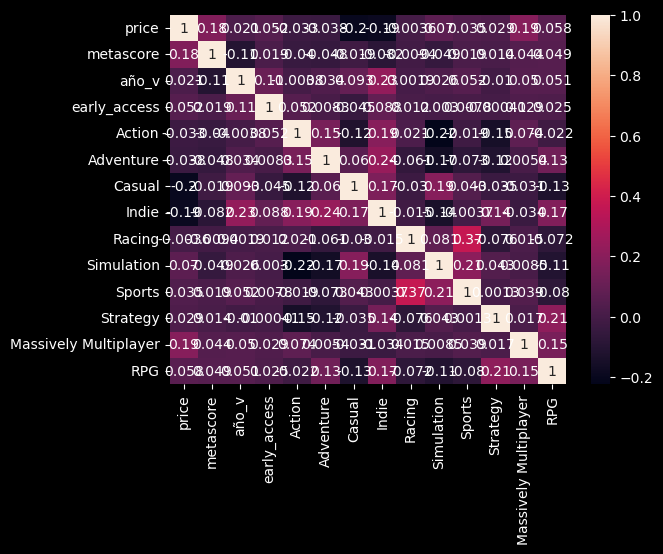

In [17]:
sns.heatmap(data=df_mod.corr(), annot=True)

In [18]:
df_mod.describe()

,price,metascore,año_v,early_access,Action,Adventure,Casual,Indie,Racing,Simulation,Sports,Strategy,Massively Multiplayer,RPG
count,28603.000000,2494.000000,28603.000000,28603.000000,28603.000000,28603.000000,28603.000000,28603.000000,28603.000000,28603.000000,28603.000000,28603.000000,28603.000000,28603.000000
mean,8.771905,72.244988,2014.815474,0.056323,0.352411,0.257595,0.267524,0.498025,0.034507,0.218404,0.039681,0.221061,0.025172,0.165752
std,9.329503,10.789183,3.510252,0.230548,0.477729,0.437318,0.442676,0.500005,0.182530,0.413170,0.195212,0.414969,0.156651,0.371864
min,0.490000,20.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.990000,66.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.990000,74.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.990000,80.000000,2017.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.990000,96.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Momento de entrenar el modelo

In [19]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,  Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR

In [20]:
features_to_normalize = ["metascore", "año_v"]
scaler = StandardScaler()
df_mod[features_to_normalize] = scaler.fit_transform(df_mod[features_to_normalize])

In [21]:
df_destransformed = df_mod.copy()
features_to_destransform = ["metascore", "año_v"]

In [22]:
df_destransformed[features_to_destransform] = scaler.inverse_transform(df_destransformed[features_to_destransform])

In [23]:
df_mod["price"].min()

0.49

In [24]:
df_mod["price"].max()

89.99

## Funcion que nos permite ver el modelo y poder saber el valor de RMSE que maneja

In [25]:
def RMSE_AND_R2(modelo, X_test, y_test) : 
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return {F"El RMSE de tu {modelo} es {rmse}, y el r2 {r2}"}

In [26]:
df_mod.rename(columns={"Massively Multiplayer" : "Massively_Multiplayer", "RPG": "Rol"}, inplace=True)

### Separe los diferentes df dependiendo de si haciamos un dropna o un drop a la columna metascore

In [27]:
df_mod_sinmetascore = df_mod.drop(columns="metascore")
df_mod_predecirmetascore_dropna = df_mod.dropna(subset="metascore")## dropna metascore

In [28]:
X_predecirmetascore = df_mod_predecirmetascore_dropna.drop(columns="price")
y_predecirmetascore = df_mod_predecirmetascore_dropna["price"]

In [29]:
X_sinmetascore = df_mod_sinmetascore.drop(columns="price")
y_sinmetascore  = df_mod_sinmetascore["price"]

## Lo que hacemos es usar el metascore sin dropna para poder inputarlo con la media, la mediana o la moda, yo use la moda para probar porque habia una cantidad de dato Nulo en metascore que habia que probar que pasaba

In [30]:
X = df_mod.drop(columns="price")
y = df_mod["price"]
y_values = y.values.flatten()

In [31]:
df_mod["metascore"].median()

0.16269665947864997

In [32]:
df_mod

,price,metascore,año_v,early_access,Action,Adventure,Casual,Indie,Racing,Simulation,Sports,Strategy,Massively_Multiplayer,Rol
0,4.99,NaN,0.907223,0,1,0,1,1,0,1,0,1,0,0
1,0.99,NaN,0.622338,0,1,1,1,0,0,0,0,0,0,0
2,2.99,NaN,0.907223,0,0,0,0,0,0,0,0,0,0,0
3,3.99,NaN,0.907223,0,1,1,0,0,0,1,0,0,0,0
4,9.99,NaN,0.907223,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28651,1.99,NaN,0.907223,0,0,0,1,1,0,1,0,1,0,0
28652,4.99,NaN,0.907223,0,0,0,1,1,0,0,0,1,0,0
28653,1.99,NaN,0.907223,0,0,0,0,1,1,1,0,0,0,0
28654,4.99,NaN,0.622338,0,0,0,1,1,0,0,0,0,0,0


## Hacemos imputaciones en los valores nan

In [33]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(X)
X_Transform = imp_mean.transform(X)

X_Transform

c:\Users\Agus_\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


array([[0.71892074, 0.90722316, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.71892074, 0.62233833, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.71892074, 0.90722316, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.71892074, 0.90722316, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.71892074, 0.62233833, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.71892074, 0.62233833, 1.        , ..., 0.        , 0.        ,
        0.        ]])

## Con Metascore pero los NA dropeados

In [34]:
X_train, X_test, y_train, y_test= train_test_split(X_predecirmetascore, y_predecirmetascore, test_size=0.33, random_state = 42)
model1dropna = LinearRegression()
model1dropna.fit(X_train, y_train)
RMSE_AND_R2(model1dropna, X_test, y_test)

{'El RMSE de tu LinearRegression() es 8.271483186539358, y el r2 0.30201106467763716'}

### Cross valid hacer crossvalid

In [35]:
# Crear una tubería con StandardScaler y LinearRegression
model = LinearRegression()
linearmodel = cross_val_score(model, X_predecirmetascore, y_predecirmetascore, cv=4 )
linearmodel

array([0.06655351, 0.24162054, 0.30856624, 0.07269017])

In [36]:
linearmodel = cross_validate(model, X_predecirmetascore, y_predecirmetascore, cv=5, scoring =["neg_root_mean_squared_error", "r2"])
linearmodel

{'fit_time': array([0.00500011, 0.00199938, 0.00199986, 0.00199962, 0.00400043]),
 'score_time': array([0.00299954, 0.00200081, 0.00199986, 0.00200033, 0.00199986]),
 'test_neg_root_mean_squared_error': array([ -6.49614505,  -9.95662571, -11.65993999,  -7.92702839,
         -6.64226731]),
 'test_r2': array([ 0.0208635 ,  0.2931085 ,  0.28394552,  0.28499538, -0.02032175])}

In [37]:
linearmodel = cross_validate(model, X_sinmetascore, y_sinmetascore, cv=5, scoring =["neg_root_mean_squared_error", "r2"])

## Grid Search

In [38]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

ridge = Ridge()
lasso = Lasso()

grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [39]:
best_lasso = grid_search_lasso.best_estimator_
RMSE_AND_R2(best_lasso, X_test, y_test)

{'El RMSE de tu Lasso(alpha=0.1) es 8.296470085460237, y el r2 0.29778765727760725'}

In [44]:
best_ridge = grid_search_ridge.best_estimator_
RMSE_AND_R2(best_ridge, X_test, y_test)

{'El RMSE de tu Ridge(alpha=10.0) es 8.262598155665035, y el r2 0.30350978558805863'}

### Grid Search para encontrar el mejor modelo

In [110]:


param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

ridge = Ridge()
lasso = Lasso()

grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [46]:
best_lasso = grid_search_lasso.best_estimator_
RMSE_AND_R2(best_lasso, X_test, y_test)

{'El RMSE de tu Lasso(alpha=0.1) es 8.296470085460237, y el r2 0.29778765727760725'}

In [47]:
best_ridge = grid_search_ridge.best_estimator_
RMSE_AND_R2(best_ridge, X_test, y_test)

{'El RMSE de tu Ridge(alpha=10.0) es 8.262598155665035, y el r2 0.30350978558805863'}

### Polinomico Regresion

In [48]:
df_destransformed.dropna(subset="metascore", inplace=True)
X_polinomionoescalado = df_destransformed.drop(columns="price")
y_polinomionoescalado = df_destransformed["price"]

In [49]:
X_train, X_test, y_train, y_test= train_test_split(X_polinomionoescalado, y_polinomionoescalado, test_size=0.33, random_state = 42)

In [50]:
degree = 3
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [51]:
modelploy_dropna_metascore = LinearRegression()
modelploy_dropna_metascore.fit(X_train_poly, y_train)
RMSE_AND_R2(modelploy_dropna_metascore, X_test_poly, y_test) ## ESTE NO FUNCIONA PORQUE ESTA ESCALADO A OTRO NIVEL MIS DATOS 

{'El RMSE de tu LinearRegression() es 1670.9073365580293, y el r2 -28482.049681212153'}

# SIN METASCORE 

In [52]:
X_train, X_test, y_train, y_test= train_test_split(X_sinmetascore, y_sinmetascore, test_size=0.33, random_state = 42)

In [53]:
model_sin_metascore = LinearRegression()
model_sin_metascore.fit(X_train, y_train)

LinearRegression()

In [54]:
RMSE_AND_R2(model_sin_metascore, X_test, y_test)

{'El RMSE de tu LinearRegression() es 8.853454593495252, y el r2 0.10357757567364012'}

### Regresion Polinomica sin metascore

In [55]:
modelploy = LinearRegression()

In [56]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
modelploy.fit(X_train_poly, y_train)

LinearRegression()

In [57]:
RMSE_AND_R2(modelploy, X_test_poly, y_test)  ## acá lo mismo que me paso arriba con los polinomios

{'El RMSE de tu LinearRegression() es 4757996.164648815, y el r2 -258901972210.49857'}

### GridSearch sin metascore

In [58]:

param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

ridge = Ridge()
lasso = Lasso()

grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [59]:
## lasso
best_lasso = grid_search_lasso.best_estimator_
RMSE_AND_R2(best_lasso, X_test, y_test)

{'El RMSE de tu Lasso(alpha=0.1) es 8.881685062019626, y el r2 0.09785172678815557'}

In [60]:
best_ridge = grid_search_ridge.best_estimator_
RMSE_AND_R2(best_ridge, X_test, y_test)

{'El RMSE de tu Ridge() es 8.853290234928041, y el r2 0.10361085835129702'}

# IMPUTANDO CON LA MEDIA EN METASCORE

In [61]:
X_train, X_test, y_train, y_test= train_test_split(X_Transform, y, test_size=0.33, random_state = 42)

In [62]:
model_inputado = LinearRegression()
model_inputado.fit(X_train, y_train)

LinearRegression()

In [63]:
RMSE_AND_R2(model_inputado, X_test, y_test)

{'El RMSE de tu LinearRegression() es 8.83097839377787, y el r2 0.10812328022848972'}

### Regresion Polinomica con valores MetaScore Inputados con la media 

In [64]:
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [65]:
modelploy = LinearRegression()

In [66]:
modelploy.fit(X_train_poly, y_train)

LinearRegression()

In [67]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

ridge = Ridge()
lasso = Lasso()

grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [68]:
## lasso
best_lasso = grid_search_lasso.best_estimator_
RMSE_AND_R2(best_lasso, X_test, y_test)

{'El RMSE de tu Lasso(alpha=0.1) es 8.861851506558004, y el r2 0.10187637517602877'}

In [69]:
## ridge
best_ridge = grid_search_ridge.best_estimator_
RMSE_AND_R2(best_lasso, X_test, y_test)

{'El RMSE de tu Lasso(alpha=0.1) es 8.861851506558004, y el r2 0.10187637517602877'}

# RandomForest

In [40]:
X_train, X_test, y_train, y_test= train_test_split(X_predecirmetascore, y_predecirmetascore, test_size=0.33, random_state = 42)

In [41]:
## Hice esta función para que se haga un poco más fácil crear modelos para randomforest
def RandomForest(X, y, profundidad):
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state = 42)
    RandomForest = RandomForestRegressor(max_depth=profundidad)
    RandomForest.fit(X_train, y_train)
    print(RMSE_AND_R2(RandomForest, X_test, y_test))
    return RandomForest

### RandomForestRegressor con dropna

In [42]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [43]:
# Crear el modelo de Random Forest
rf_model = RandomForestRegressor()

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [44]:
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntaje:", np.sqrt(grid_search.best_score_*-1))
RMSE_AND_R2(grid_search.best_estimator_, X_test, y_test)

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Mejor puntaje: 8.432620467329443


{'El RMSE de tu RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,\n                      n_estimators=50) es 7.918355069327722, y el r2 0.3603363086909447'}

In [46]:
best_random_for = grid_search.best_estimator_

In [120]:
rand_for = RandomForest(X_predecirmetascore,y_predecirmetascore, 5)

{'El RMSE de tu RandomForestRegressor(max_depth=5) es 7.965684308230009, y el r2 0.3526667172223412'}


In [121]:
RandomForest(X_sinmetascore,y_sinmetascore, 5)

{'El RMSE de tu RandomForestRegressor(max_depth=5) es 8.675525279027992, y el r2 0.13924660832103664'}


RandomForestRegressor(max_depth=5)

### RandomForestRegressor sin metascore

In [122]:
model = RandomForest(X_sinmetascore,y_sinmetascore,3)

{'El RMSE de tu RandomForestRegressor(max_depth=3) es 8.879467463401632, y el r2 0.09830217126856378'}


## Zona de Prueba

In [123]:
sinmetascore = pd.DataFrame({ 
                    # Ejemplo: metascore
    "año_v": [2010],  # Ejemplo: año
    "early_access": [1],  # Ejemplo: early_access
    "Action": [0],  # Ejemplo: género Action
    "Adventure": [1],
    "Casual" : [0],
    "Indie" : [0],
    "Racing" : [0],
    "Simulation" : [0],
    "Sports" : [0],
    "Strategy" : [0] ,
    "Massively_Multiplayer" : [0],
    "Rol" : [0] # Ejemplo: género Adventure
    # ... (proporciona los valores correspondientes para otras características)
})

conmetascore = pd.DataFrame({ 
    "metascore" : [64],         # Ejemplo: metascore
    "año_v": [2014],  # Ejemplo: año
    "early_access": [1],  # Ejemplo: early_access
    "Action": [1],  # Ejemplo: género Action
    "Adventure": [0],
    "Casual" : [0],
    "Indie" : [0],
    "Racing" : [0],
    "Simulation" : [0],
    "Sports" : [0],
    "Strategy" : [0] ,
    "Massively_Multiplayer" : [0],
    "Rol" : [0] # Ejemplo: género Adventure
    # ... (proporciona los valores correspondientes para otras características)
})

In [124]:
# Columnas a normalizar
columns_to_normalize = ["año_v"]

# Crear un escalador MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización a las columnas seleccionadas
sinmetascore[columns_to_normalize] = scaler.fit_transform(sinmetascore[columns_to_normalize])

In [144]:
# Columnas a normalizar
columns_to_normalize = ["año_v", "metascore"]

# Crear un escalador MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización a las columnas seleccionadas
conmetascore[columns_to_normalize] = scaler.fit_transform(conmetascore[columns_to_normalize])

In [126]:
print(best_lasso.predict(conmetascore))
print(best_ridge.predict(conmetascore))

[11.32836089]
[13.3517067]


c:\Users\Agus_\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
c:\Users\Agus_\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [ ]:
model1dropna.predict(conmetascore)

In [148]:
best_random_for.predict(conmetascore)

array([31.12892533])

In [146]:
rand_for.predict(conmetascore)

array([25.66936236])

In [ ]:
y_predict = model.predict(sinmetascore)
y_predict

#### RandomForestRegressor metascore inputado

In [133]:
model2 = RandomForest(X_Transform, y, 4)

{'El RMSE de tu RandomForestRegressor(max_depth=4) es 8.713454047303356, y el r2 0.1317038531025455'}


In [134]:
y_predict = model2.predict(conmetascore)
y_predict

c:\Users\Agus_\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([15.22398401])

# SVR

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_predecirmetascore, y_predecirmetascore, test_size=0.33, random_state = 42)

In [ ]:
def SVRModel(X, y):
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state = 42)
    model = SVR()
    model.fit(X_train, y_train)
    print(RMSE_AND_R2(model, X_test, y_test))
    return model

In [ ]:
model_svr =  SVRModel(X_predecirmetascore, y_predecirmetascore)

{'El RMSE de tu SVR() es 8.38613302581329, y el r2 0.28252751614720817'}


In [ ]:
y_predict = model_svr.predict(conmetascore)
y_predict

array([19.05104978])

In [ ]:
SVRModel(X_sinmetascore, y_sinmetascore)

{'El RMSE de tu SVR() es 9.087330062339333, y el r2 0.0555917150803491'}


SVR()

# Ensamble

In [135]:

# Crear el modelo
model = GradientBoostingRegressor(max_depth=2, learning_rate=0.3)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el RMSE
rmse = np.sqrt(mse)

print(f"RMSE para Gradient Boosting Regressor: {rmse}")

RMSE para Gradient Boosting Regressor: 8.170299000201691


In [ ]:
param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }

gbr = GradientBoostingRegressor()
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', refit="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             refit='neg_mean_squared_error', scoring='neg_mean_squared_error')

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_est = grid_search.best_estimator_

np.sqrt(best_score*-1)

8.363755708377074

In [137]:
new_data = pd.DataFrame({
    "metascore": [54],  # Ejemplo: metascore
    "año_v": [2009],  # Ejemplo: año
    "early_access": [1],  # Ejemplo: early_access
    "Action": [1],  # Ejemplo: género Action
    "Adventure": [0],
    "Casual" : [0],
    "Indie" : [0],
    "Racing" : [0],
    "Simulation" : [0],
    "Sports" : [0],
    "Strategy" : [1] ,
    "Massively Multiplayer" : [0],
    "RPG" : [1] # Ejemplo: género Adventure
    # ... (proporciona los valores correspondientes para otras características)
})
# Columnas a normalizar
columns_to_normalize = ["metascore", "año_v"]
# Crear un escalador MinMaxScaler
scaler = MinMaxScaler()
# Aplicar la normalización a las columnas seleccionadas
new_data[columns_to_normalize] = scaler.fit_transform(new_data[columns_to_normalize])

In [138]:
y_pred = model.predict(conmetascore)
y_pred

array([25.38814405])

In [139]:
X_train, X_test, y_train, y_test= train_test_split(X_predecirmetascore, y_predecirmetascore, test_size=0.33, random_state = 42)

In [140]:
y_pred = rand_for.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


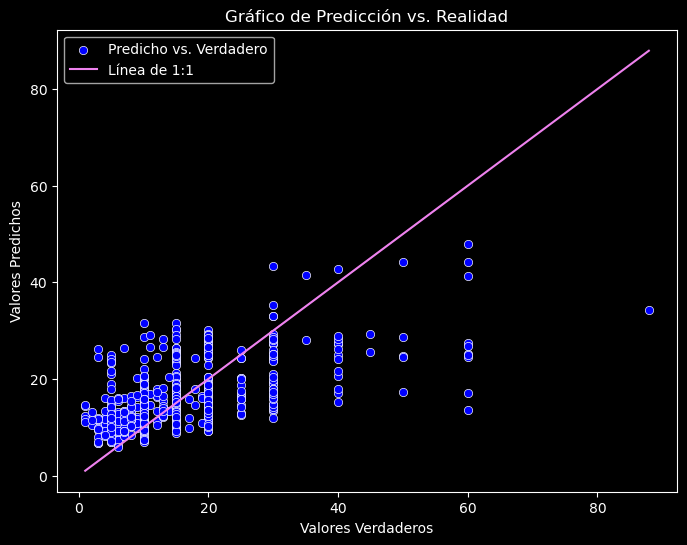

In [141]:
data = pd.DataFrame({'Predicho': y_pred, 'Verdadero': y_test})


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Verdadero', y='Predicho', data=data, color='blue', label='Predicho vs. Verdadero')
sns.lineplot(x='Verdadero', y='Verdadero', data=data, color='violet', label='Línea de 1:1')

plt.xlabel('Valores Verdaderos')
plt.ylabel('Valores Predichos')
plt.title('Gráfico de Predicción vs. Realidad')
plt.legend()
plt.show()

### Comparando con los dos mejores modelos que me dieron buenos resultados fueron esto

In [142]:
rand_for.predict(conmetascore)

array([25.66936236])

In [143]:
RMSE_AND_R2(rand_for, X_test, y_test)

{'El RMSE de tu RandomForestRegressor(max_depth=5) es 7.965684308230009, y el r2 0.3526667172223412'}

In [ ]:
y_pred = best_est.predict(conmetascore)
y_pred

array([23.98064438])

## Guardamos el modelo

In [48]:
import pickle


modelo_entrenado = best_random_for
# Guardar el modelo en un archivo
with open('../modelos/modelo_entrenado_v4.pkl', 'wb') as model_file:
    pickle.dump(modelo_entrenado, model_file)